<a href="https://colab.research.google.com/github/Kaif10/ML-ALgorithms-from-scratch/blob/master/SVM_with_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

.

## Predicting Normal or Fraud Transaction with SVM.
### This data has a lot of features (high dimensional) and SVM tends to work well in high dimensional spaces.

In [165]:
from google.colab import files
!pip install -q kaggle

In [166]:
upload = files.upload()

Saving kaggle.json to kaggle (5).json


In [167]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [168]:
#download the data from Kaggle
!kaggle datasets download -d mlg-ulb/creditcardfraud --force

 82% 54.0M/66.0M [00:00<00:00, 74.0MB/s]
100% 66.0M/66.0M [00:00<00:00, 104MB/s] 


In [169]:
import os
import zipfile


local_zip = 'creditcardfraud.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/creditcardfraud')

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [171]:
df = pd.read_csv('/tmp/creditcardfraud/creditcard.csv')

In [172]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [173]:
df.shape #rows and columns

(284807, 31)

## Highly unbalanced class labels

In [174]:
df['Class'].value_counts()

#No fraud 284315
#fraud 492

0    284315
1       492
Name: Class, dtype: int64

In [175]:
No_of_frauds= len(df[df["Class"]==1])
No_of_normals = len(df[df["Class"]==0])
total= No_of_frauds + No_of_normals
Fraud_percent= (No_of_frauds / total)*100
Normal_percent= (No_of_normals / total)*100

print(Fraud_percent)

print(Normal_percent)

0.1727485630620034
99.82725143693798


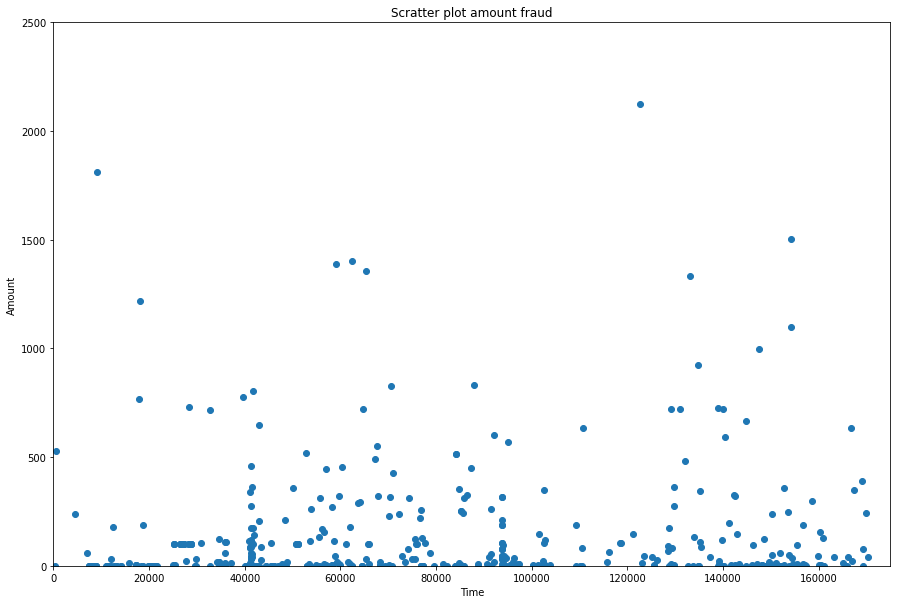

In [176]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

We drop the time feature as it has nothing to do with if the transaction was fraud or not

In [177]:
X_train = df.drop(['Time', 'Class'],axis=1) 

# We create our Class label
y_train = df['Class'] 


Now as we now the class labels are highly imbalanced. The normal transactions are 284315 whereas the fraud transactions are only 492. So we will take 

In [178]:
# We seperate ours data in two groups : a train dataset and a test dataset

# First we build our train dataset
df_train = df[0:150000] 

# We seperate the data which are the frauds and the no frauds
df_train_1 = df_train[df['Class'] == 1] 

df_train_0 = df_train[df['Class'] == 0]

print('In this dataset, we have ' + str(len(df_train_0)) +" normal transactions")
print('In this dataset, we have ' + str(len(df_train_1)) +" frauds so we need to take a similar number of non-fraud")


In this dataset, we have 149707 normal transactions
In this dataset, we have 293 frauds so we need to take a similar number of non-fraud


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


.

There are 293 fraud transactions in the training data, compared to the 149707  normal transactions. So we only take around 300 of normal transactions to balance the class labels.

In [179]:
df_sample= df_train_0.sample(300)
df_train = df_train_1.append(df_sample) # We gather the frauds with the no frauds. 

# Then we shuffle our dataset
df_train = df_train.sample(frac=1) 

During training we will drop the time feature as it has no correlation with the output labels

In [180]:
# We drop the features Time (useless), and the Class (label)
X_train = df_train.drop(['Time', 'Class'], axis=1) 

# We create our label
y_train = df_train['Class'] 


In [181]:
y_train.value_counts()
#now we can see the labels are nicely balanced

0    300
1    293
Name: Class, dtype: int64

In [182]:
#Preparing test data

X_test = df[150000:].drop(['Time', 'Class'], axis=1)
y_test = df[150000:]['Class']


### Linear SVM Model

In [184]:
from sklearn import svm
from sklearn.datasets import make_blobs

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [185]:
#import some classification metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

#Time for some prediction
y_pred = clf.predict(X_test)

## Evaluating our model on test data

In [186]:
#Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)

confusion_mat

array([[127424,   7184],
       [    17,    182]])

In [187]:
#Recall Score
recall_score(y_test, y_pred, average='macro')

0.9306015397324194

In [188]:
recall_score(y_test, y_pred, average='weighted')

0.9465828925797621

In [189]:
#Classification report

cls_report = classification_report(y_test, y_pred)
cls_report

#Our model performed well on test data.

'              precision    recall  f1-score   support\n\n           0       1.00      0.95      0.97    134608\n           1       0.02      0.91      0.05       199\n\n    accuracy                           0.95    134807\n   macro avg       0.51      0.93      0.51    134807\nweighted avg       1.00      0.95      0.97    134807\n'